In [58]:
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [59]:
engine = create_engine("sqlite:///Resources/hawaii2.sqlite")

In [60]:
Base = automap_base()

In [61]:
Base.prepare(engine, reflect=True)

In [62]:
Base.classes.keys()

['measurement', 'station']

In [63]:
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station VARCHAR(225)
date INTEGER
prcp INTEGER
tobs INTEGER


In [64]:
Measure = Base.classes.measurement

In [65]:
session = Session(engine)

In [70]:
results = (session
           .query(Measure.date, Measure.prcp)
           .filter(Measure.date >= '2016-08-01')
           .order_by(Measure.date.desc())
           .all())
results

[('2017-08-23', 0),
 ('2017-08-23', 0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-23', 0),
 ('2017-08-23', 0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0),
 ('2017-08-22', 0),
 ('2017-08-22', 0.5),
 ('2017-08-22', 0),
 ('2017-08-22', 0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0),
 ('2017-08-21', 0.02),
 ('2017-08-21', 0.56),
 ('2017-08-21', 0),
 ('2017-08-21', 0.02),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0),
 ('2017-08-20', 0.01),
 ('2017-08-20', 0),
 ('2017-08-20', 0.01),
 ('2017-08-19', 0),
 ('2017-08-19', 0),
 ('2017-08-19', 0.09),
 ('2017-08-19', 0),
 ('2017-08-19', 0),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0),
 ('2017-08-18', 0),
 ('2017-08-18', 0.06),
 ('2017-08-18', 0),
 ('2017-08-18', 0),
 ('2017-08-18', 0.06),
 ('2017-08-17', 0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-17', 0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0),
 ('2017-08-16', 0.07),
 ('2017-08-16

In [71]:
df = pd.DataFrame(results, columns=['date','percp'])
df.set_index('date', inplace=True)
df.head()

,percp
date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-23,0.00


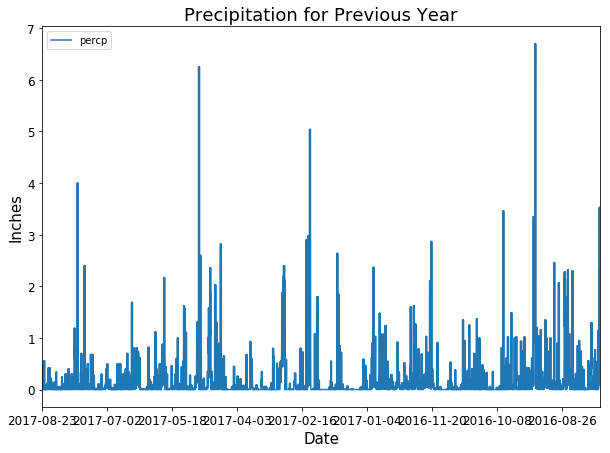

In [73]:
df.plot(figsize=(10,9))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# add title and axis labels
plt.title('Precipitation for Previous Year', fontsize=18)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Inches', fontsize=15)
plt.show()